In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import seaborn as sns
from scipy import io as sio
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from os.path import join as pjoin
import mytools

In [2]:
# general setting for figures
sns.set_theme(style="whitegrid")

# import helper class for sns subplot alignments
import SeabornFig2Grid as sfg

# set size parameters
aspect_ratio = 1 # 0.5
SIZE=(20,20) # org (15,6) or (13,8)

In [3]:
root = r'C:\Users\jefma\Documents\1_KUL\BME3\dev'
dir_data = pjoin(root,r'qssr_dvc\data')
path_log = pjoin(dir_data,r'logdata_all')
path_ntf = pjoin(dir_data,r'combi\intermediates_analysis\normtf_data')

dir_figs = pjoin(root,r'qssr_dvc\data\combi\intermediates_analysis')

## Read ftr data
- path_log : original values from ftr extraction
- path_ntf : ftr values after normality transformation

In [4]:
log = sio.loadmat(path_log,squeeze_me=True)
ntf = sio.loadmat(path_ntf,squeeze_me=True)

In [5]:
# ntf contents
data_ntf = ntf['TFDATA']
tf_mask = ntf['normality']['h'].item()

In [6]:
# log contents
data_log = log['ftr_values']
filenames = log['filenames']
ftr_names = log['ftr_names']

### 1. save inspection figures (log) for all features

In [7]:
df_all = pd.DataFrame(data=data_log,index=filenames,columns=ftr_names)

### 2. remove non-normalized features

In [8]:
# apply mask and remove non-normalized features from further analysis
rmv_idx = tf_mask.nonzero()
ftr_names = np.delete(ftr_names,rmv_idx)
data_log = np.delete(data_log,rmv_idx,1)
data_ntf = np.delete(data_ntf,rmv_idx,1)

In [9]:
# build dataframes
df_log = pd.DataFrame(data=data_log,index=filenames,columns=ftr_names)
df_ntf = pd.DataFrame(data=data_ntf,index=filenames,columns=ftr_names)

### 3. save inspection figures for normalized features (log vs ntf)

## Build presentable demo figure for report
handpicked demo features:
- RSP_Vt_MN : barely reaches normality, but manages to open distribution up so that tails are more connected
- DDA_P50_width_std: most aggressive intervention, outliers represent 20% of sample... (noisy recordings?)
- RSP_Te_AR : already normally distributed, but slightly "improved" for current setup, no outliers found. 

note to self: probably best to run through visual inspection of each mid in ftr extraction step again to confirm if any recordings should be removed. fe. EDA contains some high-noise recordings, might be those 25 but not sure..

In [15]:
pick_ftrs = ['DDA_Amp_avg','RSP_Vt_MN','RSP_Te_AR'] # replaced DDA_P50_width_std as first mid after changing ORM

In [16]:
# add column with source label
source_log = ["original" for x in range(np.size(filenames))]
source_ntf = ["normalized" for x in range(np.size(filenames))]
df_log['Source'] = source_log
df_ntf['Source'] = source_ntf

# then safely concatenate both datasets
dfc = pd.concat([df_log,df_ntf])

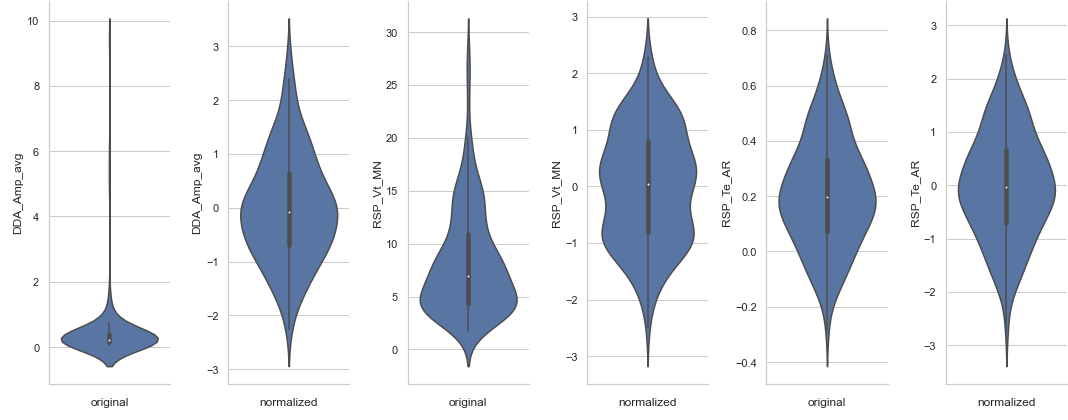

In [17]:
# build overarching figure
fig = plt.figure(figsize=(15,6))
gs = gridspec.GridSpec(1, 6)
aspect_ratio = 0.5

for i in range(3):
    ftr = pick_ftrs[i]
    
    # original source
    p = sns.catplot(y=ftr,data=df_log,kind='violin',aspect=aspect_ratio)
    p.set_axis_labels("original",ftr)
    sfg.SeabornFig2Grid(p, fig, gs[0+2*i])
    
    # normalized source
    p = sns.catplot(y=ftr,data=df_ntf,kind='violin',aspect=aspect_ratio)
    p.set_axis_labels("normalized",ftr)
    sfg.SeabornFig2Grid(p, fig, gs[1+2*i])
    
gs.tight_layout(fig)
plt.savefig(dir_figs+r'\normalization_demo.png')